In [1]:
import requests
import pandas as pd
import emoji
import re

# 発行したBearer tokenを指定
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFcVYgEAAAAAS%2BIGMj0enRluxScfESiZVdPA1GY%3DIx0dKrEcdIieMessLqyb1Att1GoNHw9hGoZa5VQS5PiP7J8G1u'

# Twitter APIのURL
search_url = "https://api.twitter.com/2/tweets/search/recent"

# 検索クエリ(リツイートとハッシュタグ付きは除く)
query_params = {'query': '値上げ -is:retweet -(has:hashtags)','max_results': 100}

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def connect_to_endpoint(url, headers, params):
    has_next = True
    c = 0
    result = []
    while has_next:
        response = requests.request("GET", search_url, headers=headers, params=params)
        if response.status_code != 200:
            raise Exception(response.status_code, response.text)

        response_body = response.json()
        result += response_body['data']

        rate_limit = response.headers['x-rate-limit-remaining']
        print('Rate limit remaining: ' + rate_limit)

        c = c + 1
        has_next = ('next_token' in response_body['meta'].keys() and c < 50)

        # next_tokenがある場合は検索クエリに追加
        if has_next:
            query_params['next_token'] = response_body['meta']['next_token']

    return result

# Pandasのデータフレームを使ってデータを加工
def create_data_frame(json_data):
    df = pd.DataFrame(json_data)

    # ツイート中のURLを削除
    df['text'] = df['text'].apply(lambda x: re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', '', x))
     # ツイート中の絵文字を削除
    df['text'] = df['text'].apply(lambda x: ''.join(c for c in x if c not in emoji.UNICODE_EMOJI))
    return df

# データフレーム中のツイートデータをCSVファイルへ出力、indexは出力しない(文字化けしないように設定)
def write_csv(data_frame):
    data_frame['text'].to_csv('値上げ.csv', index = False, encoding='utf_8_sig') 

headers = create_headers(bearer_token)
json_response = connect_to_endpoint(search_url, headers, query_params)

data_frame = create_data_frame(json_response)
write_csv(data_frame)

Rate limit remaining: 431
Rate limit remaining: 417
Rate limit remaining: 416
Rate limit remaining: 430
Rate limit remaining: 429
Rate limit remaining: 415
Rate limit remaining: 428
Rate limit remaining: 414
Rate limit remaining: 413
Rate limit remaining: 412
Rate limit remaining: 427
Rate limit remaining: 426
Rate limit remaining: 425
Rate limit remaining: 424
Rate limit remaining: 411
Rate limit remaining: 410
Rate limit remaining: 409
Rate limit remaining: 423
Rate limit remaining: 408
Rate limit remaining: 422
Rate limit remaining: 421
Rate limit remaining: 420
Rate limit remaining: 407
Rate limit remaining: 406
Rate limit remaining: 419
Rate limit remaining: 405
Rate limit remaining: 418
Rate limit remaining: 417
Rate limit remaining: 416
Rate limit remaining: 404
Rate limit remaining: 415
Rate limit remaining: 403
Rate limit remaining: 402
Rate limit remaining: 401
Rate limit remaining: 400
Rate limit remaining: 414
Rate limit remaining: 399
Rate limit remaining: 413
Rate limit r

In [2]:
df2 = pd.read_csv('値上げ.csv')
df2

,text
0,2月から値上げの商品多すぎ問題
1,あらゆるものが値上げされていく（なお給料は据え置き
2,うちも例外ではなく、、😭\n憂うつです、、値上げせなダメみたいやし、、\n\n
3,@Kochi_news @Kuraki_kazuma 高知県\n1/24 県西南部\n1/2...
4,やおきん「うまい棒」初の値上げ
...,...
4987,「また事業団は、留学生の不適切な管理が発覚したとして19～20年度に不交付だった東京福祉大に...
4988,世界一律価格、日本に押し寄せる ネトフリ13%値上げ: 日本経済新聞
4989,亀田製菓の柿ピーをよく買うのだか、ピーナッツが減ってるんよねー。\nうまい棒も値上げだし。\...
4990,なんだそれ、てかダゾーン値上げなんか…\nテレビパック契約してるから色々考えないと\n\na...


In [3]:
#Janomeのインポート
from janome.tokenizer import Tokenizer

#形態素解析
t = Tokenizer()
word_list=[]

for i in range(len(df2)):
    st = df2['text'].astype(str)
    sentence = st.iloc[i]
    tokens = t.tokenize(sentence)
    
    
    for token in tokens:
        word = token.surface
        partOfSpeech = token.part_of_speech.split(',')[0]
        if partOfSpeech in['名詞', '動詞', '形容詞', '形容動詞']:
            word_list.append(word)
        else:
            continue


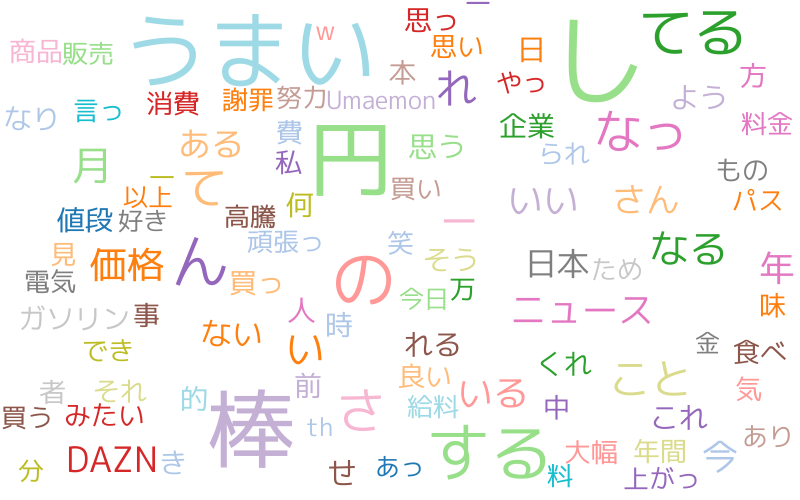

In [4]:
#nlplotのインポート
import nlplot

df3 = pd.DataFrame(word_list, columns = ['text'])
npt = nlplot.NLPlot(df3, target_col='text')

## 再頻出ワード(ここでは値上げ)をストップワードに指定
stopwords = npt.get_stopword(top_n=1, min_freq=0)

npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)
